In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("./House_Rent_Dataset.csv")
data =  data.sample(frac=1, random_state=42)
testData = data[-1000:]

data = data.drop(testData.index)
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [4]:
trainData = data.sample(frac=0.8, random_state=42)

In [5]:
validation=data.drop(trainData.index)

In [6]:
print(trainData.dtypes)
print(f'rows: {len(trainData)}, columns: {len(trainData.columns)}')

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
rows: 2997, columns: 12


In [7]:
print(validation.dtypes)
print(f'rows: {len(validation)}, columns: {len(validation.columns)}')

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
rows: 749, columns: 12


In [8]:
print(testData.dtypes)
print(f'rows: {len(testData)}, columns: {len(testData.columns)}')

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
rows: 1000, columns: 12


In [9]:
#cleaning data

trainData=trainData.drop(['Posted On','Floor','Area Type','Area Locality','Tenant Preferred','Point of Contact'],axis=1)

print(trainData.isna().sum())

BHK                  0
Rent                 0
Size                 0
City                 0
Furnishing Status    0
Bathroom             0
dtype: int64


In [60]:
testData['Furnishing Status']=testData['Furnishing Status'].replace('Furnished',3)
testData['Furnishing Status']=testData['Furnishing Status'].replace('Semi-Furnished',2)
testData['Furnishing Status']=testData['Furnishing Status'].replace('Unfurnished',1)

In [61]:
testData['City']=testData['City'].replace('Bangalore',1)
testData['City']=testData['City'].replace('Kolkata',2)
testData['City']=testData['City'].replace('Hyderabad',3)
testData['City']=testData['City'].replace('Chennai',4)
testData['City']=testData['City'].replace('Delhi',5)
testData['City']=testData['City'].replace('Mumbai',6)

In [62]:
trainData['Furnishing Status']=trainData['Furnishing Status'].replace('Furnished',3)
trainData['Furnishing Status']=trainData['Furnishing Status'].replace('Semi-Furnished',2)
trainData['Furnishing Status']=trainData['Furnishing Status'].replace('Unfurnished',1)

In [66]:
trainData['City']=trainData['City'].replace('Bangalore',1)
trainData['City']=trainData['City'].replace('Kolkata',2)
trainData['City']=trainData['City'].replace('Hyderabad',3)
trainData['City']=trainData['City'].replace('Chennai',4)
trainData['City']=trainData['City'].replace('Delhi',5)
trainData['City']=trainData['City'].replace('Mumbai',6)

In [63]:
validation['Furnishing Status']=validation['Furnishing Status'].replace('Furnished',3)
validation['Furnishing Status']=validation['Furnishing Status'].replace('Semi-Furnished',2)
validation['Furnishing Status']=validation['Furnishing Status'].replace('Unfurnished',1)

In [64]:
validation['City']=validation['City'].replace('Bangalore',1)
validation['City']=validation['City'].replace('Kolkata',2)
validation['City']=validation['City'].replace('Hyderabad',3)
validation['City']=validation['City'].replace('Chennai',4)
validation['City']=validation['City'].replace('Delhi',5)
validation['City']=validation['City'].replace('Mumbai',6)

In [67]:
trainData

,BHK,Rent,Size,City,Furnishing Status,Bathroom
46,2,4600,400,2,1,1
518,2,45000,1320,2,2,2
3930,3,75000,2395,3,1,3
201,1,10000,700,2,0,1
3520,3,65000,1444,4,1,3
...,...,...,...,...,...,...
2224,1,6500,450,1,1,1
2293,1,4000,250,1,0,1
1814,2,9750,575,1,1,2
1950,2,12000,650,1,1,2


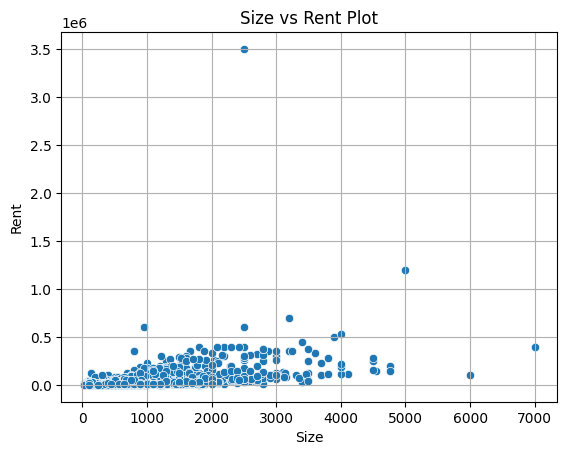

In [68]:
#rent vs Size of house

plt.grid()
sns.scatterplot(x=trainData['Size'],y=trainData['Rent'])
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("Size vs Rent Plot")
plt.savefig('figure.png')

plt.show()

In [69]:
#avrage rent prices of each city

average_rent_of_cities=trainData.groupby('City')['Rent'].mean()
print("Average Rent of different cities:\n",average_rent_of_cities)
print("Maximum rent is: ",average_rent_of_cities.max()," of city: Mumbai ")
average_rent_of_cities[average_rent_of_cities==average_rent_of_cities.max()]

Average Rent of different cities:
 City
1    27585.763060
2    11909.943953
3    20448.101266
4    22145.766372
5    30994.748031
6    85821.845907
Name: Rent, dtype: float64
Maximum rent is:  85821.84590690209  of city: Mumbai 


City
6    85821.845907
Name: Rent, dtype: float64

Text(0, 0.5, 'Rent')

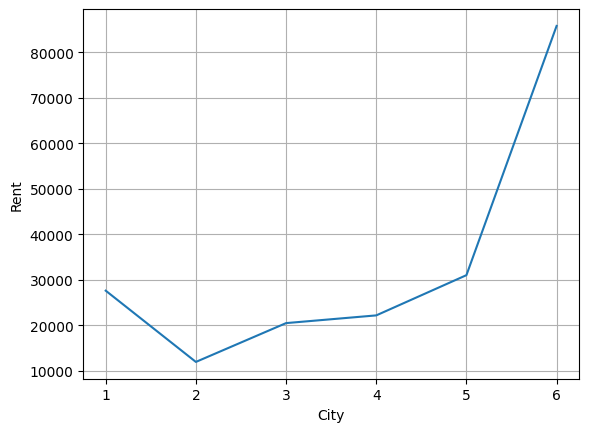

In [70]:
average_rent_of_cities.plot()
plt.grid()
plt.ylabel("Rent")

In [71]:
#regression

model = LinearRegression()
trainData

,BHK,Rent,Size,City,Furnishing Status,Bathroom
46,2,4600,400,2,1,1
518,2,45000,1320,2,2,2
3930,3,75000,2395,3,1,3
201,1,10000,700,2,0,1
3520,3,65000,1444,4,1,3
...,...,...,...,...,...,...
2224,1,6500,450,1,1,1
2293,1,4000,250,1,0,1
1814,2,9750,575,1,1,2
1950,2,12000,650,1,1,2


In [72]:
test_train=trainData[['BHK','Size', 'Furnishing Status','Bathroom', 'City']]

model.fit(test_train,trainData['Rent'])

LinearRegression()

In [73]:
test_test=testData[['BHK','Size', 'Furnishing Status','Bathroom', 'City']]

test_predictions=model.predict(test_test)

test_predictions

array([ 7.77558704e+04,  1.23469601e+04,  2.95764796e+04,  5.79247193e+04,
        7.93634843e+04,  9.86603714e+03, -2.84486471e+04,  4.28494503e+04,
        9.25677815e+04,  8.54088476e+03,  8.24776205e+03,  4.22558014e+04,
       -1.27822662e+03, -1.95641305e+04,  3.82167421e+04, -2.22249633e+04,
        2.95764796e+04,  1.15053459e+05,  7.86703317e+04,  8.13693720e+04,
       -7.23855252e+03,  5.46637883e+04,  4.70190423e+03,  3.95173805e+04,
        1.10614354e+05,  3.53682580e+04,  1.21543864e+04,  3.06346956e+03,
        9.49249879e+03,  8.47010061e+03,  1.77317478e+05, -5.33849096e+03,
        4.03472050e+04,  4.24217663e+04,  1.60828013e+05,  4.94582814e+04,
        2.72965729e+04,  9.94159442e+04,  5.16897817e+03,  2.81263974e+04,
        1.02809494e+04, -4.17839110e+03,  1.85706438e+04,  1.12905758e+04,
        3.20489600e+04, -1.10265538e+04,  4.86582218e+04,  2.97839357e+04,
        4.35277204e+04,  3.33128005e+04,  4.05029807e+04,  7.02001837e+03,
        2.98398374e+04,  

In [74]:
MAE = mean_absolute_error(testData['Rent'],test_predictions)
MSE = mean_squared_error(testData['Rent'],test_predictions)
RMSE = np.sqrt(MSE)
RMSE

54525.183884198486

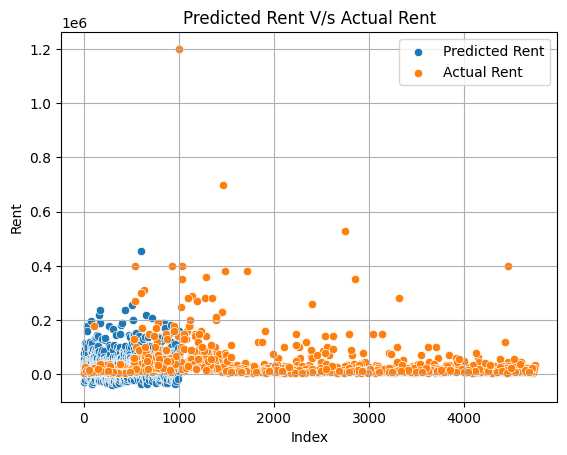

In [75]:
rent_predicted= pd.DataFrame(data=test_predictions,columns=["Rent Predicted"])
last_rent=trainData[['Rent']].tail(1000)
sns.scatterplot(y=rent_predicted['Rent Predicted'],x=rent_predicted.index,legend="auto",markers="s")
sns.scatterplot(y=last_rent['Rent'],x=last_rent.index,legend="auto",markers="s")
plt.grid()
plt.title("Predicted Rent V/s Actual Rent")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend(['Predicted Rent','Actual Rent'])
plt.show()

In [76]:
#logistic regression

test_train=trainData[['BHK','Size', 'Furnishing Status','Bathroom', 'City']]
logistic_model=LogisticRegression(solver='lbfgs',max_iter=10)
logistic_model.fit(test_train,trainData['Rent'])


/home/namish/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [87]:
logistic_prediction=logistic_model.predict(validation[['BHK','Size', 'FutestDatarnishing Status','Bathroom', 'City']])

In [88]:
logistic_prediction

array([15000, 15000, 15000, 15000, 15000, 10000, 15000, 15000, 15000,
       15000, 10000, 15000, 15000, 15000, 10000, 15000, 15000, 15000,
       15000, 15000, 15000, 10000, 15000, 15000, 15000, 15000, 15000,
       15000, 10000, 10000, 15000, 10000, 15000, 15000, 15000, 15000,
       15000, 10000, 10000, 10000, 15000, 10000, 10000, 15000, 15000,
       15000, 15000, 10000, 15000, 15000, 15000, 15000, 15000, 10000,
       10000, 15000, 10000, 10000, 15000, 15000, 15000, 15000, 15000,
       10000, 10000, 15000, 10000, 15000, 15000, 15000, 10000, 10000,
       15000, 10000, 15000, 30000, 10000, 10000, 15000, 15000, 10000,
       15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000, 10000,
       10000, 15000, 15000, 15000, 10000, 15000, 10000, 15000, 10000,
       15000, 15000, 15000, 15000, 10000, 10000, 10000, 10000, 15000,
       15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000,
       10000, 15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000,
       15000, 15000,

In [90]:
mae = mean_absolute_error(validation['Rent'],logistic_prediction)
mse = mean_squared_error(validation['Rent'],logistic_prediction)
rmse = np.sqrt(mse)
rmse

52719.93019758959

In [91]:
accuracy_score(validation['Rent'],logistic_prediction)

0.05740987983978638

In [94]:
logistic_model=LogisticRegression(solver='lbfgs',max_iter=2000)
logistic_model.fit(test_train,trainData['Rent'])


/home/namish/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [82]:
logistic_prediction_20=logistic_model.predict(validation[['BHK','Size','Furnishing Status', 'Bathroom', 'City']])

In [83]:
mae = mean_absolute_error(validation['Rent'],logistic_prediction_20)
mse = mean_squared_error(validation['Rent'],logistic_prediction_20)
rmse = np.sqrt(mse)
rmse

52719.93019758959

In [84]:
accuracy_score(validation['Rent'],logistic_prediction_20)

0.05740987983978638

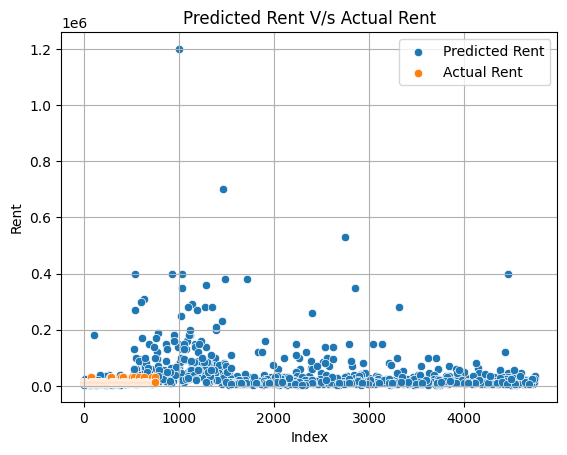

In [100]:
rent_predicted= pd.DataFrame(data=logistic_prediction_20,columns=["Rent Predicted"])
last_rent=trainData[['Rent']].tail(1000)
sns.scatterplot(y=last_rent['Rent'],x=last_rent.index,legend="auto",markers="s")
sns.scatterplot(y=rent_predicted['Rent Predicted'],x=rent_predicted.index,legend="auto",markers="s")
plt.grid()
plt.title("Predicted Rent V/s Actual Rent")
plt.xlabel("Index")
plt.ylabel("Rent")
plt.legend(['Predicted Rent','Actual Rent'])
plt.show()